# Homework 1 Question 3: Spectral Clustering

## Import Packages and Data:

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import scipy
from sklearn.metrics import pairwise_distances

## Import Files
nodes_file = []
with open("nodes.txt") as fid:
    for line in fid.readlines():
        name = line.replace("\n", "").split("\t")
        nodes_file.append(name)

with open("edges.txt") as graph_file:
    edges = [line.split() for line in graph_file]
    edges = np.array(edges).astype(int)

## Make numbers int
for node in nodes_file:
    node[0] = int(node[0])
    node[2] = int(node[2])

## Define n and k:
n = 1490
k = 2

## Find isolated nodes
isolated = []
for node in nodes_file:
    if node[0] not in edges:
        isolated.append(node[0])

## Create nodes variable without isolated points
new_nodes = []
for node in nodes_file:
    if node[0] not in isolated:
        new_nodes.append(node)
    else: continue
        
## Check
#print(new_nodes)
#print(edges)
#print(edges[0:4], edges[-4:])

## Create Algorithm:

In [2]:
## Create zero matrix
zero_mat = np.zeros((n,n))

## Create Adjacency matrix
for edge in edges:
    zero_mat[edge[0]-1][edge[1]-1] = 1
    zero_mat[edge[1]-1][edge[0]-1] = 1
## rows or columns of all zeros mean they're isolated
A = np.delete(zero_mat, [iso-1 for iso in isolated], 0)
A = np.delete(A, [iso-1 for iso in isolated], 1)
    
## Create Degree Matrix:
D = np.zeros((n,n))
for edge in edges:
    D[edge[0]-1][edge[0]-1] += 1
    D[edge[1]-1][edge[1]-1] += 1
D = np.delete(D, [iso-1 for iso in isolated], 0)
D = np.delete(D, [iso-1 for iso in isolated], 1)
## Create Laplacian Matrix:
L = D - A

## Compute eigenvalues
e, v, _ = scipy.linalg.svd(L)
e = np.flip(e, 1)

In [11]:
## Update k
def try_k(k, e):
    e = e[:, 0:k]

## K-Means:
    model = KMeans(k)
    model.fit(e)
    labels = model.labels_
    #print(labels)

## Count in each cluster:
    label_lst = []
    for i in range(k):
        label_lst.append(np.count_nonzero(labels == i))
    print("Number of Clusters: ", k)
    print("Count in each cluster:")
    print(label_lst)

## Nodes in each Cluster:
    for i in range(k):
        print(" -"*5, "Cluster ", i+1, ":", " -"*5)
        ind = [index for index, t in enumerate(labels) if t == i]
        zero_count = 0
        one_count = 0
        for index in ind:
            #print(new_nodes[index])
            zero_count += np.count_nonzero(new_nodes[index][2] == 0)
            one_count += np.count_nonzero(new_nodes[index][2] == 1)

## Majority Label:
        if zero_count > one_count:
            print("Majority Label: 0", '\n', "Count: ", zero_count)
            print("Mismatch Rate: ", one_count/(zero_count+one_count))
            if one_count/(zero_count+one_count) > 0:
                mismatch = one_count/(zero_count+one_count)
        elif one_count > zero_count:
            print("Majority Label: 1",'\n', "Count: ", one_count)
            print("Mismatch Rate: ", zero_count/(zero_count+one_count))
            if zero_count/(zero_count+one_count) > 0:
                mismatch = zero_count/(zero_count+one_count)
        elif one_count == zero_count:
            continue
            print("One and Zero Labels Tied",'\n', "Count: ", one_count)
    print('\n', "Mismatch Rate:")
    return mismatch

print(try_k(2, e))

## Uncomment below to iterate k values

## Create mismatch rate y values:
#mismatch_rate = []
#for i in range(2,200):
#    mismatch_rate.append(try_k(i, e))
#print(mismatch_rate)

Number of Clusters:  2
Count in each cluster:
[1222, 2]
 - - - - - Cluster  1 :  - - - - -
Majority Label: 1 
 Count:  636
Mismatch Rate:  0.4795417348608838
 - - - - - Cluster  2 :  - - - - -
Majority Label: 0 
 Count:  2
Mismatch Rate:  0.0

 Mismatch Rate:
0.4795417348608838


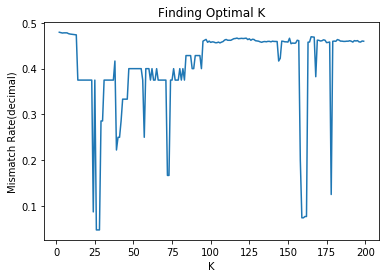

In [10]:
plt.plot(range(2,200), mismatch_rate)
plt.title("Finding Optimal K")
plt.xlabel("K")
plt.ylabel("Mismatch Rate(decimal)")
plt.show()

In [84]:
## K Vales for Smallest Mismatch Rate:
print(try_k(26, e))
print(try_k(27, e))
print(try_k(28, e))

0.047619047619047616
0.047619047619047616
0.047619047619047616
